In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Amir Bismi\Desktop\EDA_PROJECT\Data\interim\cleaned_day2.csv")
df.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,log_price
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365,5.010635
1,Skylit midtown castle,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,5.420535
2,The village of harlem....new york !,Elisabeth,Manhattan,Harlem,Private room,150,3,0,2019-06-23,0.00,1,365,5.017280
3,Cozy entire floor of brownstone,Lisaroxanne,Brooklyn,Clinton hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,4.499810
4,Entire apt: spacious studio/loft by central park,Laura,Manhattan,East harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,4.394449


## **UNIVARIATE ANALYSIS**

### **Price Distribution**

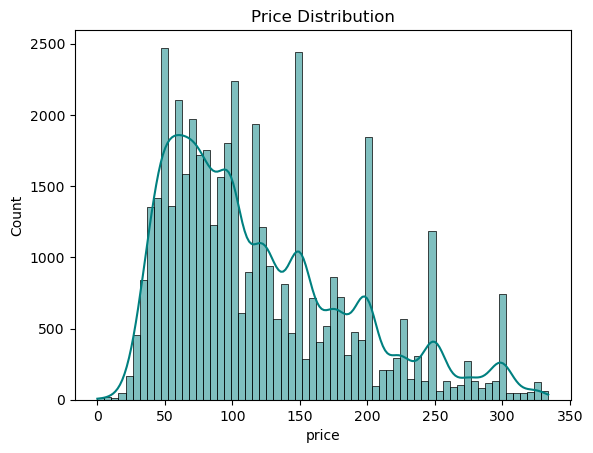

In [24]:
sns.histplot(df['price'],kde = True,color='teal')
plt.title("Price Distribution")
plt.savefig(r"C:\Users\Amir Bismi\Desktop\EDA_PROJECT\Reports\Figures\price.png")
plt.show()

##### **Findings**

- Most listings are concentrated in the lower price range
- Distribution is right-skewed
- Few listings have very high prices

##### **Insights**

- Majority of Airbnb listings are affordable
- Extreme high prices are rare


### **Room Type Share**

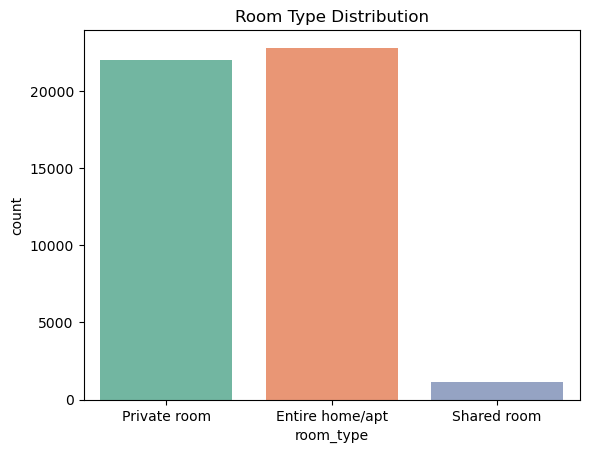

In [36]:
sns.countplot(x='room_type',hue='room_type',data=df,palette='Set2')
plt.title("Room Type Distribution")
plt.savefig("../reports/figures/roomtype_count.png")
plt.show()

##### **Findings**

- Majority share belongs to private rooms and entire homes
- Shared rooms represent a small percentage

##### **Insights**

- market is dominated by private stays
- Shared rooms are less popular among users

### **Listing by Location**

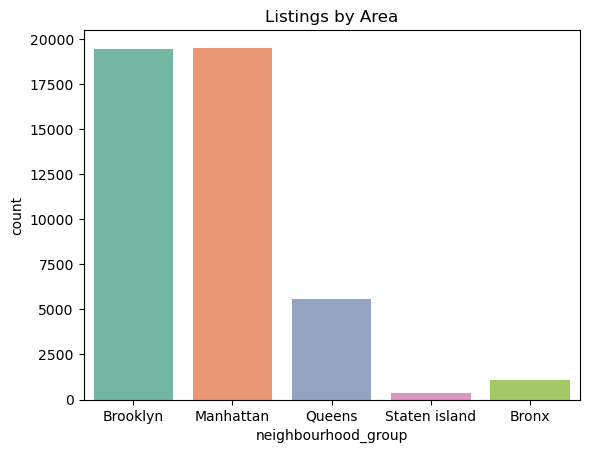

In [13]:
sns.countplot(x='neighbourhood_group',hue ='neighbourhood_group', data=df,palette='Set2',legend=False)
plt.title("Listings by Area")
plt.savefig(r"C:\Users\Amir Bismi\Desktop\EDA_PROJECT\Reports\Figures\location_count.png")
plt.show()

##### **Findings**

- Some neighbourhood groups have significantly more listings
- Listing distribution is uneven across locations

##### **Insights**

- Certain areas are more popular for Airbnb
- High listing count indicates higher demand or tourism

## **BIVARIATE ANALYSIS**

### **Price vs No. of Reviews**

<function matplotlib.pyplot.show(close=None, block=None)>

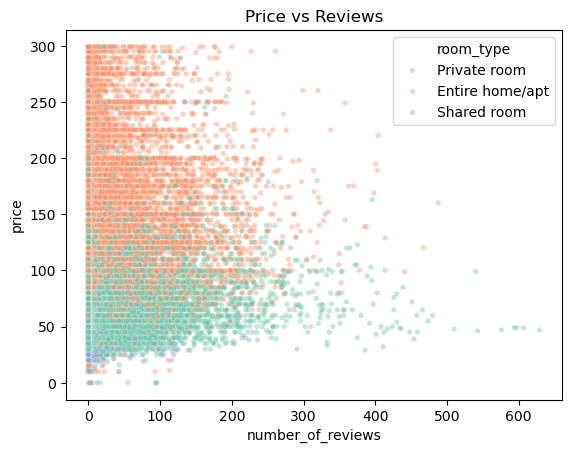

In [19]:
sns.scatterplot(x='number_of_reviews', y='price',hue ='room_type', data=df[df['price'] < 300], alpha=0.4,palette='Set2',s=15)
plt.title("Price vs Reviews")
plt.show

##### **Findings**

- Listings with moderate prices tend to have more reviews
- Very expensive listings often have fewer reviews

##### **Insights**

- Affordable listings attract more bookings
- High-priced listings are booked less frequently

### **Correlation Heatmap**

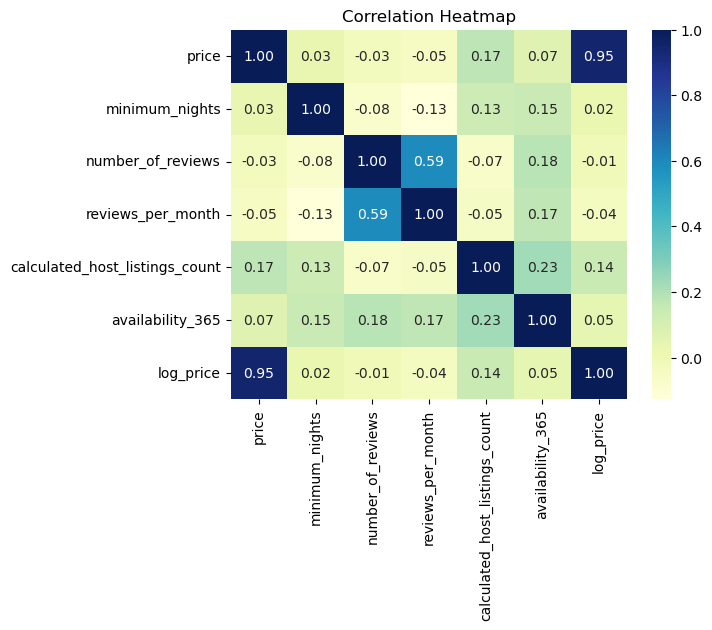

In [20]:
sns.heatmap(df.corr(numeric_only=True),annot = True,cmap="YlGnBu",fmt='.2f')
plt.title("Correlation Heatmap")
plt.savefig(r"C:\Users\Amir Bismi\Desktop\EDA_PROJECT\Reports\Figures\corr_heatmap.png")
plt.show()

##### **Findings**

- Price shows weak correlation with most numeric variables
- Strong correlation exists between price and log_price
- Reviews and reviews_per_month are moderately correlated

##### **Insights**

- Numeric variables alone do not strongly determine price
- Location and room type likely influence price more
- Derived features behave as expected

### **Price by Room Type**

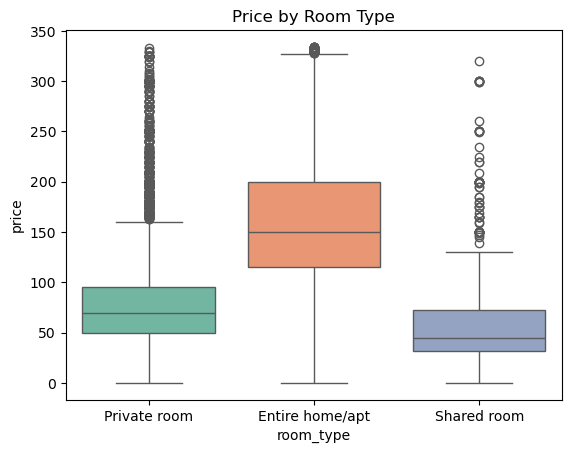

In [29]:
sns.boxplot(x='room_type',y='price',hue='room_type',data=df,palette='Set2',legend=False)
plt.title("Price by Room Type")
plt.savefig(r"C:\Users\Amir Bismi\Desktop\EDA_PROJECT\Reports\Figures\price_roomtype.png")
plt.show()

##### **Findings**

- Entire homes have highest median price
- Private rooms are cheaper
- Shared rooms are lowest priced

##### **Insights**

- Room type strongly impacts pricing
- Renting an entire home costs significantly more
- Budget travelers prefer private/shared rooms

### **Price by Location**

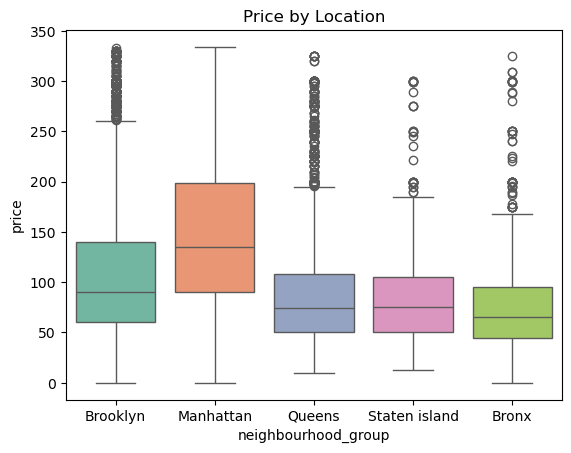

In [32]:
sns.boxplot(x='neighbourhood_group',y='price',hue='neighbourhood_group',data=df,palette='Set2',legend=False)
plt.title("Price by Location")
plt.savefig(r"C:\Users\Amir Bismi\Desktop\EDA_PROJECT\Reports\Figures\price_location")
plt.show()

##### **Findings**

- Some neighbourhood groups show higher median prices
- Price spread varies across locations

##### **Insights**

- Location is a major factor affecting price
- Premium areas charge higher prices
- Budget areas offer cheaper stays

## **SEGMENT ANALYSIS**

### **Average Price by Location**

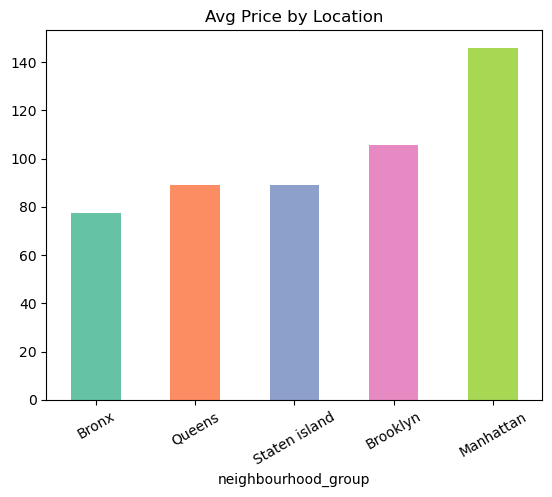

In [33]:
df.groupby('neighbourhood_group')['price'].mean().sort_values().plot(kind='bar',color=sns.color_palette("Set2"))
plt.title("Avg Price by Location")
plt.xticks(rotation=30)
plt.savefig(r"C:\Users\Amir Bismi\Desktop\EDA_PROJECT\Reports\Figures\avgprice_location.png") 
plt.show()

##### **Findings**

- Average price differs significantly across locations
- Some areas have consistently higher average prices

##### **Insights**

- Premium neighbourhoods drive higher revenue
- Budget-friendly areas attract price-sensitive customers

## **OVERALL INSIGHTS**

##### **Overall Findings**

- Most listings are low to moderately priced
- Price distribution is highly right-skewed
- Entire homes and premium locations are more expensive
- Location and room type strongly influence price

##### **Overall Insights**

- Affordable listings attract more reviews
- Premium areas drive higher pricing
- Numeric variables have weak impact on price
- Pricing strategy depends mainly on location and room type